In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Pre-Processing

### Metadata

In [2]:
metadata = pd.read_csv('SraRunTable.txt', sep='\t')

In [3]:
metadata.head()

BioSample   DATASTORE_filetype  Experiment  MBases  MBytes  \
0  SAMEA4044115  sra unknown_contigs  ERX1537982      45      29   
1  SAMEA4044116  sra unknown_contigs  ERX1537983      44      28   
2  SAMEA4044117  sra unknown_contigs  ERX1537984      39      24   
3  SAMEA4044118  sra unknown_contigs  ERX1537985      33      21   
4  SAMEA4044119  sra unknown_contigs  ERX1537986      39      25   

                Organism         Run  SRA_Sample              Sample_Name  \
0  human oral metagenome  ERR1466857  ERS1215225  SAMEA4044115 ERS1215225   
1  human oral metagenome  ERR1466858  ERS1215226  SAMEA4044116 ERS1215226   
2  human oral metagenome  ERR1466859  ERS1215227  SAMEA4044117 ERS1215227   
3  human oral metagenome  ERR1466860  ERS1215228  SAMEA4044118 ERS1215228   
4  human oral metagenome  ERR1466861  ERS1215229  SAMEA4044119 ERS1215229   

  environment_biome     ...       SRA_Study colection_date  \
0              oral     ...       ERP016180      20-Jan-13   
1              oral     ...       ERP016180      20-Jan-13   
2              oral     ...       ERP016180      20-Jan-13   
3              oral     ...       ERP016180      20-Jan-13   
4              oral     ...       ERP016180      20-Jan-13   

  geographic_location_country_and_or_sea  \
0                                Finland   
1                                Finland   
2                                Finland   
3                                Finland   
4                                Finland   

  human_associated_environmental_package  investigation_type   latitude  \
0                       human-associated          metagenome  65.009056   
1                       human-associated          metagenome  65.009056   
2                       human-associated          metagenome  65.009056   
3                       human-associated          metagenome  65.009056   
4                       human-associated          metagenome  65.009056   

   longitude                     project_name sequencing_method  sample_type  
0  25.518028  Oral and nasal microbiome in PD    Illumina MiSeq      control  
1  25.518028  Oral and nasal microbiome in PD    Illumina MiSeq      control  
2  25.518028  Oral and nasal microbiome in PD    Illumina MiSeq      control  
3  25.518028  Oral and nasal microbiome in PD    Illumina MiSeq      control  
4  25.518028  Oral and nasal microbiome in PD    Illumina MiSeq      control  

[5 rows x 38 columns]

In [4]:
metadata.columns

Index(['BioSample', 'DATASTORE_filetype', 'Experiment', 'MBases', 'MBytes',
       'Organism', 'Run', 'SRA_Sample', 'Sample_Name', 'environment_biome',
       'environment_feature', 'environment_material', 'host_sex', 'Assay_Type',
       'AvgSpotLen', 'BioProject', 'Center_Name', 'Consent',
       'DATASTORE_provider', 'InsertSize', 'Instrument', 'LibraryLayout',
       'LibrarySelection', 'LibrarySource', 'Library_Name', 'LoadDate',
       'Platform', 'ReleaseDate', 'SRA_Study', 'colection_date',
       'geographic_location_country_and_or_sea',
       'human_associated_environmental_package', 'investigation_type',
       'latitude', 'longitude', 'project_name', 'sequencing_method',
       'sample_type'],
      dtype='object')

In [5]:
metadata.shape

(284, 38)

In [6]:
metadata['geographic_location_country_and_or_sea'].value_counts()

Finland    284
Name: geographic_location_country_and_or_sea, dtype: int64

In [7]:
metadata['environment_biome'].value_counts()

oral     148
nasal    136
Name: environment_biome, dtype: int64

In [8]:
metadata['host_sex'].value_counts()

female    143
male      141
Name: host_sex, dtype: int64

### OTU Table

In [9]:
otu_table = pd.read_csv('parkinsons_otu_table.tsv', sep='\t')

In [10]:
otu_table.head()

TAGAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCATGCCTTACACATGCAAGTCGAACGGCAGCACGGGAGCAATCCTGGTGGCGAGTGGCGAACGGGTGAGTAATACATCGGAACGTGCCCTGTAGTGGGGGATAACTAGTCGAAAGACTAGCTAATACCGCATACGACCTGAGGGTGAAAGTGGGGGACCGCAAGGCCTCATGCTATAGGAGCGGCCGATGTCTGATTAGCTAGTTGGTGGGGTAAAGGCCTACCAAGGCGACGATCAGTAGCTGGTCTGAGAGGACGATCAGCCACACTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTGGGGAATTTTGGACAATGGGGGCAACCCTGATCCAGCAATGCCGCGTGTGTGAAGAAGGCCTTCGGGTTGTAAAGCACTTTTGTCCGGGAAGAAATCGCACCTGATAATACCGGGTGTGGATGACGGTACCGGAAGAATAAGGACCGGCTAACTACGTGCCAGCAGCCGCGGTAATACG  \
0                                                  0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
1                                                  0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
2                                                 10                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
3                                                  0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
4                                                  0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

   TAGAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCATGCCTTACACATGCAAGTCGAACGGCAGCACGGGAGCAATCCTGGTGGCGAGTGGCGAACGGGTGAGTAATACATCGGAACGTGCCCTGTAGTGGGGGATAACTAGTCGAAAGACTAGCTAATACCGCATACGACCTGAGGGTGAAAGTGGGGGACCGCAAGGCCTCATGCTATAGGAGCGGCCGATGTCTGATTAGCTAGTTGGTGGGGTAAAGGCCTACCAAGGCGACGATCAGTAGCTGGTCTGAGAGGACGATCAGCCACACTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTGGGGAATTTTGGACAATGGGGGCAACCCTGATCCAGCAATGCCGCGTGTGTGAAGAAGGCCTTCGGGTTGTAAAGCACTTTTGTCCGGGAAGAAATCGCACCTGATAATACCGGGTGTGGATGACGGTACCGGAAGAATAAGGACCGGCTAACTACGTGCCAGCAGCCGCGGTAATACTA  \
0                                                  0                                                                                                                                                                                                                   

In [11]:
otu_table.shape

(284, 16576)

### Taxonomy Table

In [12]:
tax_table = pd.read_csv('parkinsons_tax_table.tsv', sep='\t')

In [13]:
tax_table.head()

Kingdom          Phylum                Class                  Order  \
0  Bacteria  Proteobacteria  Gammaproteobacteria  Betaproteobacteriales   
1  Bacteria  Proteobacteria  Gammaproteobacteria  Betaproteobacteriales   
2  Bacteria  Proteobacteria  Gammaproteobacteria  Betaproteobacteriales   
3  Bacteria  Proteobacteria  Gammaproteobacteria  Betaproteobacteriales   
4  Bacteria  Actinobacteria       Actinobacteria      Corynebacteriales   

               Family              Genus Species  
0    Burkholderiaceae          Ralstonia     NaN  
1    Burkholderiaceae          Ralstonia     NaN  
2    Burkholderiaceae          Ralstonia     NaN  
3    Burkholderiaceae          Ralstonia     NaN  
4  Corynebacteriaceae  Corynebacterium_1     NaN

In [14]:
tax_table.shape

(16576, 7)

In [15]:
tax_table['otu_index'] = range(1, 16577)
tax_table.head()

Kingdom          Phylum                Class                  Order  \
0  Bacteria  Proteobacteria  Gammaproteobacteria  Betaproteobacteriales   
1  Bacteria  Proteobacteria  Gammaproteobacteria  Betaproteobacteriales   
2  Bacteria  Proteobacteria  Gammaproteobacteria  Betaproteobacteriales   
3  Bacteria  Proteobacteria  Gammaproteobacteria  Betaproteobacteriales   
4  Bacteria  Actinobacteria       Actinobacteria      Corynebacteriales   

               Family              Genus Species  otu_index  
0    Burkholderiaceae          Ralstonia     NaN          1  
1    Burkholderiaceae          Ralstonia     NaN          2  
2    Burkholderiaceae          Ralstonia     NaN          3  
3    Burkholderiaceae          Ralstonia     NaN          4  
4  Corynebacteriaceae  Corynebacterium_1     NaN          5

### Combined

In [16]:
otu_table.columns = tax_table['otu_index']

In [17]:
otu_table['group'] = metadata['sample_type']

In [18]:
otu_table['sex'] = metadata['host_sex']

In [19]:
otu_table['oral_nasal'] = metadata['environment_biome']

In [20]:
otu_table.shape

(284, 16579)

In [21]:
otu_table.head()

otu_index   1  2  3  4  5     6  7     8    9  10     ...      16570  16571  \
0           0  0  0  0  0     0  0  2379    0   0     ...          0      0   
1           0  0  0  0  0   727  0     0  193   0     ...          0      0   
2          10  0  0  0  0  4910  0  1947    0   0     ...          0      0   
3           0  0  0  0  0     0  0   484  218   0     ...          0      0   
4           0  0  0  0  0     0  0     0  403   0     ...          0      0   

otu_index  16572  16573  16574  16575  16576    group     sex  oral_nasal  
0              0      0      0      0      0  control    male        oral  
1              0      0      0      0      0  control  female        oral  
2              0      0      0      0      0  control    male        oral  
3              0      0      0      0      0  control  female        oral  
4              0      0      0      0      0  control    male        oral  

[5 rows x 16579 columns]

## Data Exploration

#### Check to see sample distribution

In [22]:
male_df = otu_table[otu_table['sex'] == 'male']
female_df = otu_table[otu_table['sex'] == 'female']

In [23]:
male_df['group'].value_counts()

control    71
PD         70
Name: group, dtype: int64

In [24]:
female_df['group'].value_counts()

control    72
PD         71
Name: group, dtype: int64

In [25]:
male_df['oral_nasal'].value_counts()

oral     73
nasal    68
Name: oral_nasal, dtype: int64

In [26]:
female_df['oral_nasal'].value_counts()

oral     75
nasal    68
Name: oral_nasal, dtype: int64

All the groups seem to have the same number of samples which is good! 

#### Oral vs. Nasal

In [27]:
oral_df = otu_table[otu_table['oral_nasal'] == 'oral']
nasal_df = otu_table[otu_table['oral_nasal'] == 'nasal']

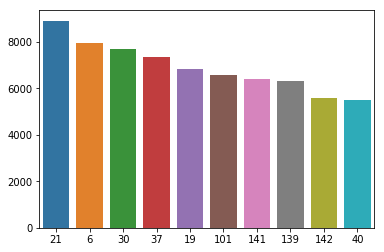

In [28]:
top_10_oral = oral_df.max(axis=1).sort_values(ascending=False)[0:10]
sns.barplot(x=top_10_oral.index, y=top_10_oral, order = top_10_oral.index)

In [29]:
for bacteria in top_10_oral.index:
    print('Phylum: ', tax_table.iloc[bacteria]['Phylum'])
    print('Genus: ', tax_table.iloc[bacteria]['Genus'])
    print('Species:', tax_table.iloc[bacteria]['Species'])
    print('-----')

Phylum:  Firmicutes
Genus:  Streptococcus
Species: nan
-----
Phylum:  Proteobacteria
Genus:  Ralstonia
Species: nan
-----
Phylum:  Actinobacteria
Genus:  Corynebacterium_1
Species: nan
-----
Phylum:  Proteobacteria
Genus:  Ralstonia
Species: nan
-----
Phylum:  Firmicutes
Genus:  Streptococcus
Species: nan
-----
Phylum:  Actinobacteria
Genus:  Corynebacterium_1
Species: nan
-----
Phylum:  Actinobacteria
Genus:  Rothia
Species: nan
-----
Phylum:  Firmicutes
Genus:  Streptococcus
Species: nan
-----
Phylum:  Actinobacteria
Genus:  Corynebacterium_1
Species: nan
-----
Phylum:  Proteobacteria
Genus:  Moraxella
Species: nan
-----


In [30]:
#Declare empty set to hold genus names
oral_genus_set = set()
for bacteria in top_10_oral.index:
    oral_genus_set.add(tax_table.iloc[bacteria]['Genus'])

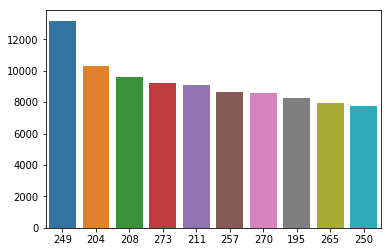

In [31]:
top_10_nasal = nasal_df.max(axis=1).sort_values(ascending=False)[0:10]
sns.barplot(x=top_10_nasal.index, y=top_10_nasal, order = top_10_nasal.index)

In [32]:
for bacteria in top_10_nasal.index:
    print('Phylum: ', tax_table.iloc[bacteria]['Phylum'])
    print('Genus: ', tax_table.iloc[bacteria]['Genus'])
    print('Species:', tax_table.iloc[bacteria]['Species'])
    print('-----')

Phylum:  Proteobacteria
Genus:  Neisseria
Species: nan
-----
Phylum:  Actinobacteria
Genus:  Corynebacterium_1
Species: nan
-----
Phylum:  Firmicutes
Genus:  Streptococcus
Species: mitis
-----
Phylum:  Proteobacteria
Genus:  Ralstonia
Species: nan
-----
Phylum:  Actinobacteria
Genus:  Corynebacterium_1
Species: nan
-----
Phylum:  Proteobacteria
Genus:  Neisseria
Species: nan
-----
Phylum:  Firmicutes
Genus:  Streptococcus
Species: sanguinis
-----
Phylum:  Firmicutes
Genus:  Streptococcus
Species: nan
-----
Phylum:  Fusobacteria
Genus:  Leptotrichia
Species: nan
-----
Phylum:  Firmicutes
Genus:  Streptococcus
Species: nan
-----


In [33]:
#Declare empty set to hold genus names
nasal_genus_set = set()
for bacteria in top_10_nasal.index:
    nasal_genus_set.add(tax_table.iloc[bacteria]['Genus'])
nasal_genus_set

{'Corynebacterium_1',
 'Leptotrichia',
 'Neisseria',
 'Ralstonia',
 'Streptococcus'}

### Common genus among nasal and oral microbiome

In [34]:
nasal_genus_set.intersection(oral_genus_set)

{'Corynebacterium_1', 'Ralstonia', 'Streptococcus'}

## Control vs. PD Nasal

In [35]:
nasal_control_df = otu_table[(otu_table['group'] == 'control') & (otu_table['oral_nasal']=="nasal")]
nasal_pd_df = otu_table[(otu_table['group'] == 'PD') & (otu_table['oral_nasal']=="nasal")]

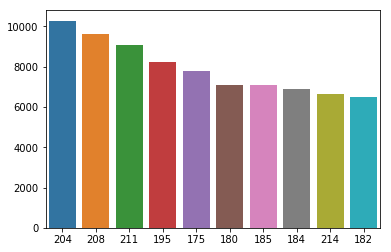

In [36]:
top_10_control = nasal_control_df.max(axis=1).sort_values(ascending=False)[0:10]
sns.barplot(x=top_10_control.index, y=top_10_control, order = top_10_control.index)

In [37]:
for bacteria in top_10_control.index:
    print('Phylum: ', tax_table.iloc[bacteria]['Phylum'])
    print('Genus: ', tax_table.iloc[bacteria]['Genus'])
    print('-----')

Phylum:  Actinobacteria
Genus:  Corynebacterium_1
-----
Phylum:  Firmicutes
Genus:  Streptococcus
-----
Phylum:  Actinobacteria
Genus:  Corynebacterium_1
-----
Phylum:  Firmicutes
Genus:  Streptococcus
-----
Phylum:  Proteobacteria
Genus:  Moraxella
-----
Phylum:  Actinobacteria
Genus:  Corynebacterium_1
-----
Phylum:  Proteobacteria
Genus:  Lautropia
-----
Phylum:  Actinobacteria
Genus:  Corynebacterium_1
-----
Phylum:  Firmicutes
Genus:  Veillonella
-----
Phylum:  Firmicutes
Genus:  Streptococcus
-----


In [38]:
#Declare empty set to hold genus names
control_nasal_genus_set = set()
for bacteria in top_10_control.index:
    control_nasal_genus_set.add(tax_table.iloc[bacteria]['Genus'])
control_nasal_genus_set

{'Corynebacterium_1', 'Lautropia', 'Moraxella', 'Streptococcus', 'Veillonella'}

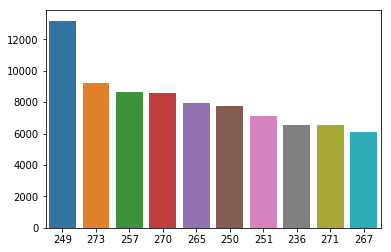

In [39]:
top_10_pd = nasal_pd_df.max(axis=1).sort_values(ascending=False)[0:10]
sns.barplot(x=top_10_pd.index, y=top_10_pd, order = top_10_pd.index)

In [40]:
for bacteria in top_10_pd.index:
    print('Phylum: ', tax_table.iloc[bacteria]['Phylum'])
    print('Genus: ', tax_table.iloc[bacteria]['Genus'])
    print('Species:', tax_table.iloc[bacteria]['Species'])
    print('-----')

Phylum:  Proteobacteria
Genus:  Neisseria
Species: nan
-----
Phylum:  Proteobacteria
Genus:  Ralstonia
Species: nan
-----
Phylum:  Proteobacteria
Genus:  Neisseria
Species: nan
-----
Phylum:  Firmicutes
Genus:  Streptococcus
Species: sanguinis
-----
Phylum:  Fusobacteria
Genus:  Leptotrichia
Species: nan
-----
Phylum:  Firmicutes
Genus:  Streptococcus
Species: nan
-----
Phylum:  Actinobacteria
Genus:  Corynebacterium_1
Species: nan
-----
Phylum:  Actinobacteria
Genus:  Corynebacterium_1
Species: nan
-----
Phylum:  Firmicutes
Genus:  Streptococcus
Species: nan
-----
Phylum:  Proteobacteria
Genus:  Neisseria
Species: nan
-----


In [41]:
#Declare empty set to hold genus names
pd_nasal_genus_set = set()
for bacteria in top_10_pd.index:
    pd_nasal_genus_set.add(tax_table.iloc[bacteria]['Genus'])
pd_nasal_genus_set

{'Corynebacterium_1',
 'Leptotrichia',
 'Neisseria',
 'Ralstonia',
 'Streptococcus'}

In [42]:
pd_nasal_genus_set.intersection(control_nasal_genus_set)

{'Corynebacterium_1', 'Streptococcus'}

## Top ten genus unique to both groups in nasal

In [43]:
pd_nasal_genus_set.symmetric_difference(control_nasal_genus_set)

{'Lautropia',
 'Leptotrichia',
 'Moraxella',
 'Neisseria',
 'Ralstonia',
 'Veillonella'}

Hmmm...top 10 control is different than pd as well...suspicious or interesting?

## Control vs PD for Oral

In [44]:
oral_control_df = otu_table[(otu_table['group'] == 'control') & (otu_table['oral_nasal']=="oral")]
oral_pd_df = otu_table[(otu_table['group'] == 'PD') & (otu_table['oral_nasal']=="oral")]

##### Plot showing top 10 OTUs in Oral control samples

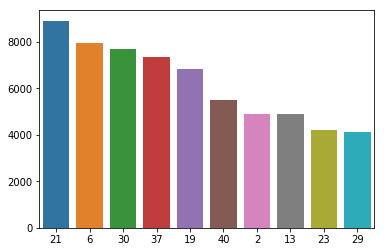

In [45]:
top_10_oral_control = oral_control_df.max(axis=1).sort_values(ascending=False)[0:10]
sns.barplot(x=top_10_oral_control.index, y=top_10_oral_control, order = top_10_oral_control.index)

In [46]:
for bacteria in top_10_oral_control.index:
    print('Phylum: ', tax_table.iloc[bacteria]['Phylum'])
    print('Genus: ', tax_table.iloc[bacteria]['Genus'])
    print('Species:', tax_table.iloc[bacteria]['Species'])
    print('-----')

Phylum:  Firmicutes
Genus:  Streptococcus
Species: nan
-----
Phylum:  Proteobacteria
Genus:  Ralstonia
Species: nan
-----
Phylum:  Actinobacteria
Genus:  Corynebacterium_1
Species: nan
-----
Phylum:  Proteobacteria
Genus:  Ralstonia
Species: nan
-----
Phylum:  Firmicutes
Genus:  Streptococcus
Species: nan
-----
Phylum:  Proteobacteria
Genus:  Moraxella
Species: nan
-----
Phylum:  Proteobacteria
Genus:  Ralstonia
Species: nan
-----
Phylum:  Actinobacteria
Genus:  Cutibacterium
Species: nan
-----
Phylum:  Firmicutes
Genus:  Streptococcus
Species: nan
-----
Phylum:  Actinobacteria
Genus:  Corynebacterium_1
Species: nan
-----


In [47]:
#Declare empty set to hold genus names
control_oral_genus_set = set()
for bacteria in top_10_oral_control.index:
    control_oral_genus_set.add(tax_table.iloc[bacteria]['Genus'])
control_oral_genus_set

{'Corynebacterium_1',
 'Cutibacterium',
 'Moraxella',
 'Ralstonia',
 'Streptococcus'}

##### Plot showing top 10 OTUs in Oral PD samples

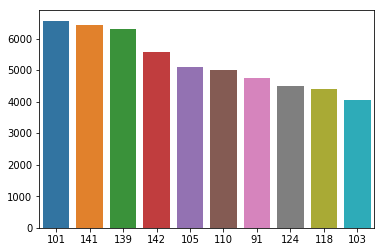

In [48]:
top_10_oral_pd = oral_pd_df.max(axis=1).sort_values(ascending=False)[0:10]
sns.barplot(x=top_10_oral_pd.index, y=top_10_oral_pd, order = top_10_oral_pd.index)

In [49]:
for bacteria in top_10_oral_pd.index:
    print('Phylum: ', tax_table.iloc[bacteria]['Phylum'])
    print('Genus: ', tax_table.iloc[bacteria]['Genus'])
    print('Species:', tax_table.iloc[bacteria]['Species'])
    print('-----')

Phylum:  Actinobacteria
Genus:  Corynebacterium_1
Species: nan
-----
Phylum:  Actinobacteria
Genus:  Rothia
Species: nan
-----
Phylum:  Firmicutes
Genus:  Streptococcus
Species: nan
-----
Phylum:  Actinobacteria
Genus:  Corynebacterium_1
Species: nan
-----
Phylum:  Firmicutes
Genus:  Streptococcus
Species: nan
-----
Phylum:  Proteobacteria
Genus:  Lautropia
Species: nan
-----
Phylum:  Firmicutes
Genus:  Streptococcus
Species: nan
-----
Phylum:  Actinobacteria
Genus:  Corynebacterium_1
Species: nan
-----
Phylum:  Proteobacteria
Genus:  Lautropia
Species: mirabilis
-----
Phylum:  Proteobacteria
Genus:  Neisseria
Species: nan
-----


In [50]:
#Declare empty set to hold genus names
pd_oral_genus_set = set()
for bacteria in top_10_oral_pd.index:
    pd_oral_genus_set.add(tax_table.iloc[bacteria]['Genus'])
pd_oral_genus_set

{'Corynebacterium_1', 'Lautropia', 'Neisseria', 'Rothia', 'Streptococcus'}

In [51]:
pd_oral_genus_set.intersection(control_oral_genus_set)

{'Corynebacterium_1', 'Streptococcus'}

## Top ten genus unique to both groups in oral

In [52]:
pd_oral_genus_set.symmetric_difference(control_oral_genus_set)

{'Cutibacterium', 'Lautropia', 'Moraxella', 'Neisseria', 'Ralstonia', 'Rothia'}

## ML

In [53]:
#Imports
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

In [54]:
otu_table['group'].value_counts()

control    143
PD         141
Name: group, dtype: int64

In [55]:
#Label encoder
le = preprocessing.LabelEncoder()
le.fit(otu_table['group'])
labels = le.transform(otu_table['group'])

In [56]:
#Preprocess
X = np.array(otu_table)[:,:-3]

In [57]:
#Control vs. PD prediction

models = [LogisticRegression(penalty='l1'), LinearSVC(), RandomForestClassifier()]
model_names = ['LR', 'Linear SVM', 'RF']
# lm = LogisticRegression(penalty='l1')
# lm.fit(X, labels)

print('Cross validation for each model starting...')
for i in range(len(models)):
    print(model_names[i])
    
    cross_val = (cross_val_score(models[i], X, labels, cv=10))
    
    print('Cross Val Scores: ', cross_val)
    print('Average Score: ', cross_val.mean())
    print('---')

Cross validation for each model starting...
LR


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Cross Val Scores:  [ 0.6         0.48275862  0.55172414  0.46428571  0.53571429  0.46428571
  0.5         0.39285714  0.57142857  0.39285714]
Average Score:  0.495591133005
---
Linear SVM


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Cross Val Scores:  [ 0.63333333  0.51724138  0.5862069   0.53571429  0.60714286  0.39285714
  0.57142857  0.39285714  0.46428571  0.57142857]
Average Score:  0.527249589491
---
RF


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

Cross Val Scores:  [ 0.5         0.48275862  0.55172414  0.5         0.75        0.42857143
  0.5         0.60714286  0.53571429  0.53571429]
Average Score:  0.539162561576
---


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [58]:
#Sex prediction

#Label encoder
le = preprocessing.LabelEncoder()
le.fit(otu_table['sex'])
labels = le.transform(otu_table['sex'])

#Preprocess
X = np.array(otu_table)[:,:-3]

models = [LogisticRegression(penalty='l1'), LinearSVC(), RandomForestClassifier()]
model_names = ['LR', 'Linear SVM', 'RF']
# lm = LogisticRegression(penalty='l1')
# lm.fit(X, labels)

print('Cross validation for each model starting...')
for i in range(len(models)):
    print(model_names[i])
    
    cross_val = (cross_val_score(models[i], X, labels, cv=10))
    
    print('Cross Val Scores: ', cross_val)
    print('Average Score: ', cross_val.mean())
    print('---')

Cross validation for each model starting...
LR


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Cross Val Scores:  [ 0.63333333  0.51724138  0.44827586  0.60714286  0.67857143  0.5
  0.71428571  0.64285714  0.5         0.42857143]
Average Score:  0.567027914614
---
Linear SVM


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Cross Val Scores:  [ 0.63333333  0.51724138  0.44827586  0.57142857  0.64285714  0.57142857
  0.67857143  0.64285714  0.5         0.46428571]
Average Score:  0.567027914614
---
RF


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

Cross Val Scores:  [ 0.46666667  0.44827586  0.48275862  0.53571429  0.60714286  0.5
  0.53571429  0.64285714  0.57142857  0.64285714]
Average Score:  0.543341543514
---


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [59]:
#Oral vs. nasal prediction

#Label encoder
le = preprocessing.LabelEncoder()
le.fit(otu_table['oral_nasal'])
labels = le.transform(otu_table['oral_nasal'])

#Preprocess
X = np.array(otu_table)[:,:-3]

models = [LogisticRegression(penalty='l1'), LinearSVC(), RandomForestClassifier()]
model_names = ['LR', 'Linear SVM', 'RF']
# lm = LogisticRegression(penalty='l1')
# lm.fit(X, labels)

print('Cross validation for each model starting...')
for i in range(len(models)):
    print(model_names[i])
    
    cross_val = (cross_val_score(models[i], X, labels, cv=10))
    
    print('Cross Val Scores: ', cross_val)
    print('Average Score: ', cross_val.mean())
    print('---')

Cross validation for each model starting...
LR


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Cross Val Scores:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Average Score:  1.0
---
Linear SVM
Cross Val Scores:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Average Score:  1.0
---
RF


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

Cross Val Scores:  [ 1.          0.96551724  1.          1.          1.          1.          1.
  1.          1.          1.        ]
Average Score:  0.996551724138
---


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
